In [37]:
import numpy as np
import colour
import matplotlib.pyplot as plt

In [38]:
M = colour.blindness.matrix_cvd_Machado2009('Deuteranomaly', 1)
s, V = np.linalg.eig(M)
print(np.linalg.norm(M@V.T[0]))
v = V.T[0]
v = v / np.linalg.norm(v)
v

5.73655224658e-07


array([ 0.92205474, -0.38601936,  0.02835681])

In [39]:
cube_vertices = [np.array([0, 0, 0]), np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1]), np.array([1, 1, 0]), np.array([1, 0, 1]), np.array([0, 1, 1]), np.array([1, 1, 1])]
center = np.array([1/2, 1/2, 1/2])

min_dist = np.inf
min_idx = 0
for idx, e in enumerate(cube_vertices):
    if np.linalg.norm(center - (v + e)) < min_dist:
        min_dist = np.linalg.norm(center - (v + e))
        min_idx = idx
    print(e, np.linalg.norm(center - (v + e)))

anchor_1 = cube_vertices[min_idx]
anchor_2 = np.ones(3) - anchor_1
print(f'Anchor 1: {anchor_1}, Anchor 2: {anchor_2}')

[0 0 0] 1.08885619246
[1 0 0] 1.74060831037
[0 1 0] 0.643093375434
[0 0 1] 1.11459473719
[1 1 0] 1.50255734394
[1 0 1] 1.75682409776
[0 1 1] 0.685771616398
[1 1 1] 1.5213126543
Anchor 1: [0 1 0], Anchor 2: [ 1.  0.  1.]


In [40]:
basis = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
max_scalar = 0
max_idx = 0
for idx, e in enumerate(basis):
    if np.abs(np.dot(e, v)) > max_scalar:
        max_scalar = np.dot(e, v)
        max_idx = idx
    print(e, np.abs(np.dot(e, v)))

n = basis[max_idx]
e_y, e_z = [basis[i] for i in range(len(basis)) if i != max_idx]
print(f'Normal: {n}, e_y: {e_y}, _z: {e_z}')

[1 0 0] 0.922054741146
[0 1 0] 0.386019359163
[0 0 1] 0.0283568101653
Normal: [1 0 0], e_y: [0 1 0], _z: [0 0 1]


In [41]:
d = 1 / np.abs(np.dot(n, v))
d

1.0845343073206231

In [42]:
y = e_y * np.dot(anchor_2 - (anchor_1 + d * v), e_y)
z = e_z * np.dot(anchor_2 - (anchor_1 + d * v), e_z)
print(f'y: {y}, z: {z}')

y: [-0.         -0.58134876 -0.        ], z: [ 0.          0.          0.96924607]


In [43]:
s = 1
for t_y, t_z in ((0,0), (1, 0), (0, 1), (1, 1)):
    x = anchor_1 + d/2 * v + t_y * y + t_z * z
    color_1 = x + s*d/2 *v
    color_2 = x - s*d/2 *v
    print(t_y, t_z)
    print(tuple((255 * color_1).astype(int)), tuple((255 * color_2).astype(int)))
    print(tuple((255 * M@color_1).astype(int)), tuple((255 * M@color_2).astype(int)))

0 0
(255, 148, 7) (0, 255, 0)
(219, 171, 10) (219, 171, 10)
1 0
(255, 0, 7) (0, 106, 0)
(91, 71, 4) (91, 71, 4)
0 1
(255, 148, 255) (0, 255, 247)
(163, 183, 250) (163, 183, 250)
1 1
(255, 0, 255) (0, 106, 247)
(35, 83, 244) (35, 83, 244)


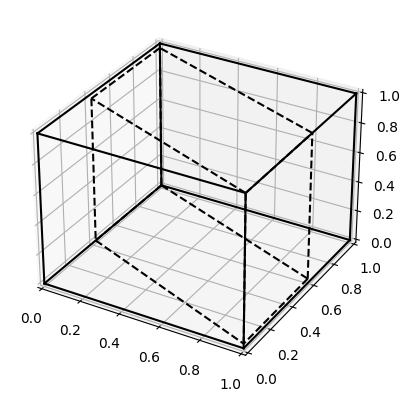

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cube_vertices = [
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
]

cube_edges = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 0],
    [4, 5],
    [5, 6],
    [6, 7],
    [7, 4],
    [0, 4],
    [1, 5],
    [2, 6],
    [3, 7]
]

for edge in cube_edges:
    r = [cube_vertices[edge[0]][0], cube_vertices[edge[1]][0]]
    g = [cube_vertices[edge[0]][1], cube_vertices[edge[1]][1]]
    b = [cube_vertices[edge[0]][2], cube_vertices[edge[1]][2]]
    ax.plot(r, g, b, color='black')

parallelepiped_vertices = [
    anchor_1,
    anchor_2,
    anchor_1 + d * v,
    anchor_2 - d * v,
    anchor_1 + y,
    anchor_2 - y,
    anchor_1 + z,
    anchor_2 - z,
    anchor_1 + d * v + y,
    anchor_2 - d * v + y,
    anchor_1 + d * v + z,
    anchor_2 - d * v + z
]

parallelepiped_edges = [
    [0, 2],
    [0, 4], 
    [0, 6],
    [1, 3],
    [1, 5],
    [1, 7],
    [2, 5],
    [2, 7],
    [3, 4],
    [3, 6],
    [4, 7],
    [5, 6]
]

for edge in parallelepiped_edges:
    r = [parallelepiped_vertices[edge[0]][0], parallelepiped_vertices[edge[1]][0]]
    g = [parallelepiped_vertices[edge[0]][1], parallelepiped_vertices[edge[1]][1]]
    b = [parallelepiped_vertices[edge[0]][2], parallelepiped_vertices[edge[1]][2]]
    ax.plot(r, g, b, color='black', linestyle='dashed')

# ax.set_xlabel('R')
# ax.set_ylabel('G')
# ax.set_zlabel('B')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.show()


In [45]:
import plotly.graph_objects as go

fig = go.Figure()

for edge in cube_edges:
    fig.add_trace(go.Scatter3d(
        x=[cube_vertices[edge[0]][0], cube_vertices[edge[1]][0]],
        y=[cube_vertices[edge[0]][1], cube_vertices[edge[1]][1]],
        z=[cube_vertices[edge[0]][2], cube_vertices[edge[1]][2]],
        mode='lines',
        line=dict(color='black'),
        name='Cube'
    ))

for edge in parallelepiped_edges:
    fig.add_trace(go.Scatter3d(
        x=[parallelepiped_vertices[edge[0]][0], parallelepiped_vertices[edge[1]][0]],
        y=[parallelepiped_vertices[edge[0]][1], parallelepiped_vertices[edge[1]][1]],
        z=[parallelepiped_vertices[edge[0]][2], parallelepiped_vertices[edge[1]][2]],
        mode='lines',
        line=dict(color='red'),
        name='Parallelepiped'
    ))

fig.update_layout(
    scene=dict(
        xaxis=dict(range=[0, 1]),
        yaxis=dict(range=[0, 1]),
        zaxis=dict(range=[0, 1]),
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='manual'
    ),
    showlegend=False,
    scene_xaxis_showticklabels=False,
    scene_yaxis_showticklabels=False,
    scene_zaxis_showticklabels=False,
)

fig.show()
